In [1]:
from __future__ import division
from scipy import *
from pylab import *
from scipy.optimize import *
from tqdm import tqdm
import time
import os
from math import *
from math import tan
import numpy as np

# Parameters needed

In [2]:
## ====================================== Thalamus ===========================================

tT=0.005
DeltaTha = 0.007 + 0.007 + 0.001 + 0.005 + 0.001 + 0.001

In [3]:
def f(x):
    return(((((x**3)*(tT**3)) - 3*x*tT) / (1 - 3*(x**2)*(tT**2))) - tan(x*DeltaTha))

x = fsolve(f,100)
f(x)
print(x/6.28)


[ 13.83814881]


# Resolution process

In [4]:
angsp = []
freq = []
delai = np.arange(0,0.100,0.001)

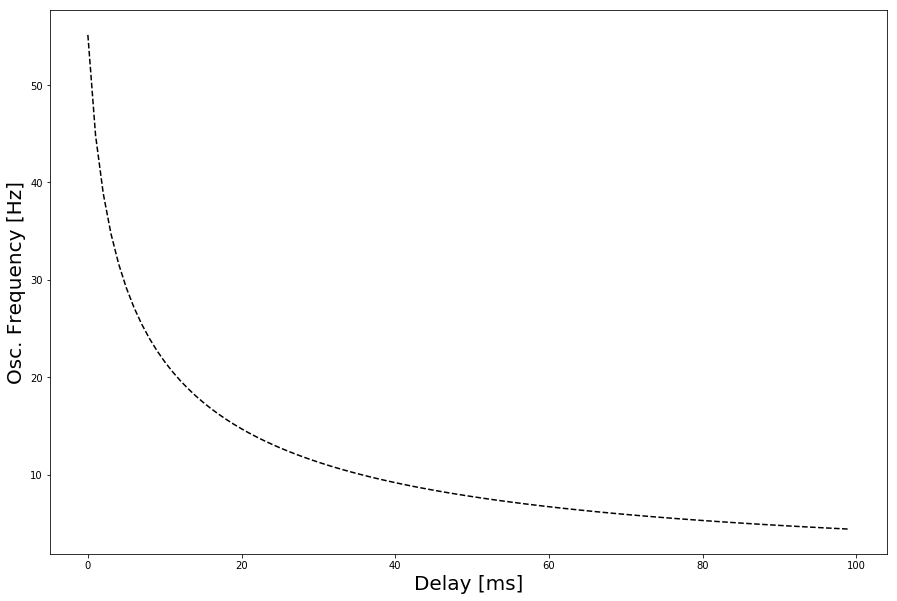

In [5]:
init=200
it=0

for z in np.arange(0,0.100,0.001):
    
    
    DeltaTha = z
    
    x = fsolve(f,init)
    f(x)
    #print(x/6.28,z,x)
    it+=1
    init = x-3
    
    angsp.append(x)    
    freq.append(x/6.28)

fig = plt.figure(figsize=(15,10))
plt.plot(delai*1000,freq,'k--')
plt.xlabel('Delay [ms]',fontsize=20)
plt.ylabel('Osc. Frequency [Hz]',fontsize=20)
plt.show()

# Phase diagram

In [6]:
## ====================================== Thalamus ===========================================

tT=0.005
DeltaTha = 0.001 + 0.007 + 0.001 + 0.005 + 0.001 + 0.001
print(DeltaTha*1000)

16.000000000000004


In [7]:
def syst(var): # définition du système
    a, b = var[0], var[1] # définition des variables
    eq1 = (b-a)*cos(w*DeltaTha) + 3*(w**2)*(tT**2) - 1
    eq2 = (b-a)*sin(w*DeltaTha) - (w**3)*(tT**3) + w*tT
    res = [eq1, eq2]
    return res

In [8]:
a0, b0 = 5, 0     # Initialisation de la recherche des solutions numériques
sol_ini = [a0, b0]

In [9]:
w = float(angsp[1])
print(w)
    
sol=fsolve(syst, sol_ini)
print(sol)

281.6455486354133
[ 2.67891597  2.33642308]


/home/imn/.pyenv/versions/3.5.2/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
